## Importing Libraries

In [1]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
from skimage import io
import pydot

# 1.4 Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

## Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/gdrive')  

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/gdrive/MyDrive/FA_Endterm/airline_clnd.csv')

In [4]:
df.head()

,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Exploratory Data Analysis

In [5]:
df.shape

(103904, 25)

In [6]:
df.columns

Index(['SR', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [8]:
# Checking for null values
df.isnull().sum()

SR                                     0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction    

In [9]:
# Replacing null vales with mean
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

In [10]:
df['Customer_Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64

In [11]:
df['Type_of_Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64

In [12]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [13]:
df['Inflight_wifi_service'].value_counts()

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight_wifi_service, dtype: int64

In [14]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

## Data Visualisation

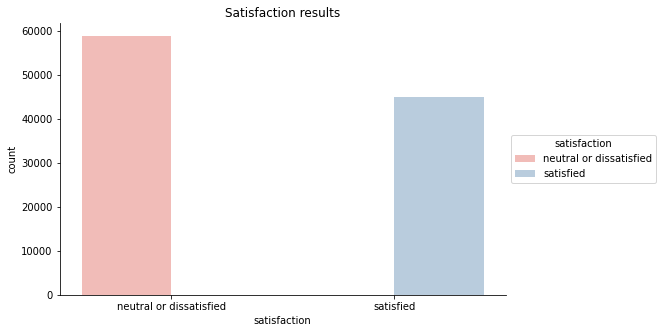

In [15]:
# creating graph for customer satisfaction
plt.figure(figsize = (8,5))
sns.countplot(x ="satisfaction", data = df, hue ="satisfaction", palette ="Pastel1" )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

neutral or dissatisfied customers are more than satisfied customers by 17024.
56.67 % of the passenger were neutral or dissatisfied with the service provided by the airline

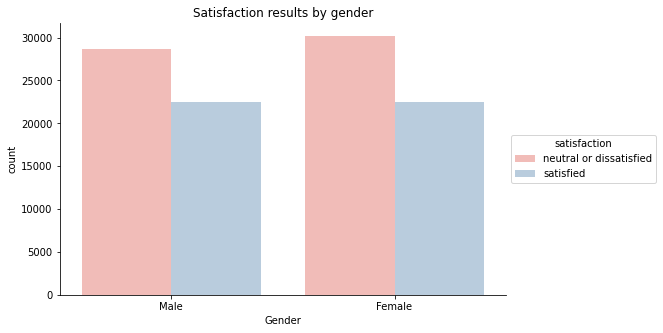

In [16]:
# creating graph for customer satisfaction on the basis of gender
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Pastel1" )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

The gender split in the dataset is relatively even with 49.25% of the passengers male. It should be acknowledged that this is a binary classification leaving little room for those who do not wish to disclose their gender or do not conform to the two traditional genders. Subsequently, in reruns of such surveys, criteria gender could be updated.

Leaving aside, it appears that the satisfaction level for both genders were relatively similar, with over 55% of individuals from both genders reporting that they were not satisfied with the service.

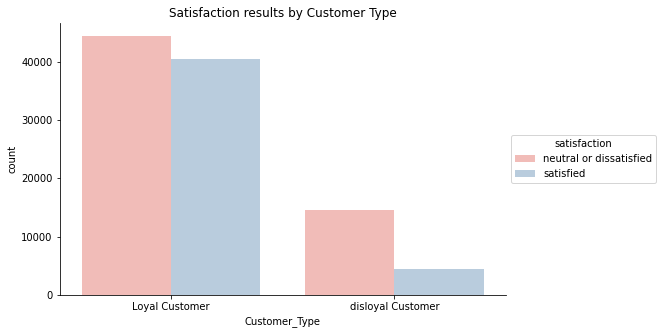

In [17]:
# creating graph for customer satisfaction on the basis of customer type
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer_Type", data = df, hue ="satisfaction" ,palette ="Pastel1" )

plt.title("Satisfaction results by Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

This variable when examined alongside overall satisfaction, highlights a major concern. There is a high number of loyal customers that are dissatisfied with the services. Given that individuals typically become loyal customers because they value the services offered by the said business, their lack of satisfaction suggests that the service may have changed recently or that the service is failing to meet the transforming market. As stated previously, loyal customers can be the backbone of a business and as such if the service does not improve, the business may face difficulty.

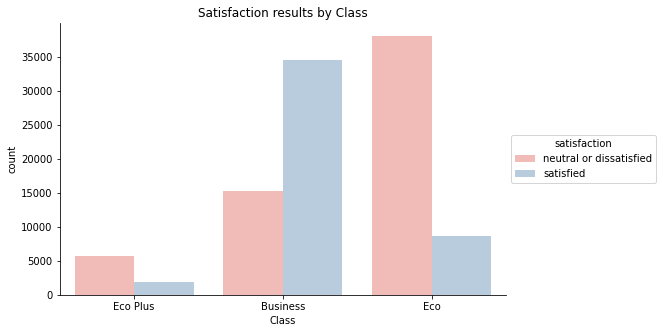

In [18]:
# creating graph for customer satisfaction on the basis of class
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = df, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Classes also highlight the dominance of business travel as the majority who travelled via business class were satisfied with the service they received. In contrast, those who were in eco class were particularly dissatisfied with the service, with 81% voicing dissatisfaction. Given that 45% of the passengers travelled via eco, the airline should focus on improving their services in this area.

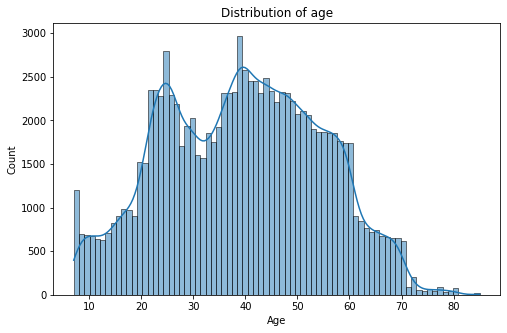

In [19]:
# creating histogram for age distribution
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = df, kde= True)

plt.title("Distribution of age")
plt.show()

Examining the age variable, some aspects appear prominently. Firstly, it appears that the majority of those satisfied with the quality of the service were above average age, between 40 and 60. However, after approx. 60years, satisfaction suddenly drops. Likewise, many of the younger passengers found issues with the service.

In [20]:
df.columns

Index(['SR', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [21]:
# single out variables which are related to service scores
service_scores = df[['Inflight_wifi_service','Departure/Arrival_time_convenient', 
                              'Ease_of_Online_booking','Gate_location', 'Food_and_drink', 
                              'Online_boarding', 'Seat_comfort','Inflight_entertainment', 'On-board_service', 'Leg_room_service',
                              'Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness']]

In [22]:
# calculate sum of scores
df["Total_score"] = service_scores.sum(axis = 1)

In [23]:
# find max possible score 
max_score = len(service_scores.columns)*5

In [24]:
# convert sum of scores to percentage
df["Total_score_percent"] = round((df["Total_score"]/max_score)*100,1)

In [25]:
df['Total_score_cat'] = pd.cut(df['Total_score'],                                              # Equal interval cuts between min and max
                       3,                                                                      # Three cuts
                       labels=["Least Satisfied","Moderately Satisfied","Highly Satisfied"]    # Label for each cut
                       )

In [26]:
df['Total_score_cat'] = df['Total_score_cat'].astype('object')

In [28]:
# defining numerical variables
num = [col for col in df.columns if df[col].dtypes!='O']
num

['SR',
 'id',
 'Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'Total_score',
 'Total_score_percent']

In [29]:
# defining categorical variables
cat = [col for col in df.columns if df[col].dtypes=='O']
cat

['Gender',
 'Customer_Type',
 'Type_of_Travel',
 'Class',
 'satisfaction',
 'Total_score_cat']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

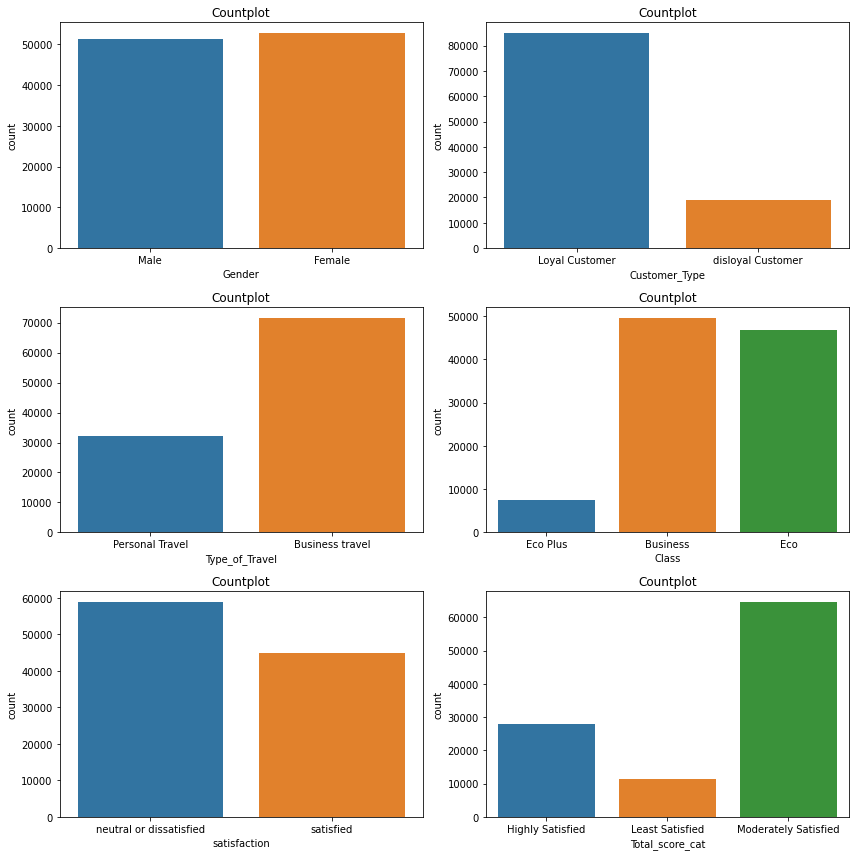

In [30]:
# creating countplots
plt.figure(figsize=(12, 12))
n=1
for i in cat:
    plt.subplot(3, 2, n)
    sns.countplot(df[i])
    plt.title(f'Countplot')
    n=n+1
plt.tight_layout()
plt.show()

Female customers are more than Male customers.
Loyal customers are more than disloyal customers.
People travel more in business travel than personal travel.
Business class is preferred more than Eco and Eco plus.

Text(0.5, 1.0, 'Online boarding satisfaction in refrence to type of travel')

<Figure size 432x288 with 0 Axes>

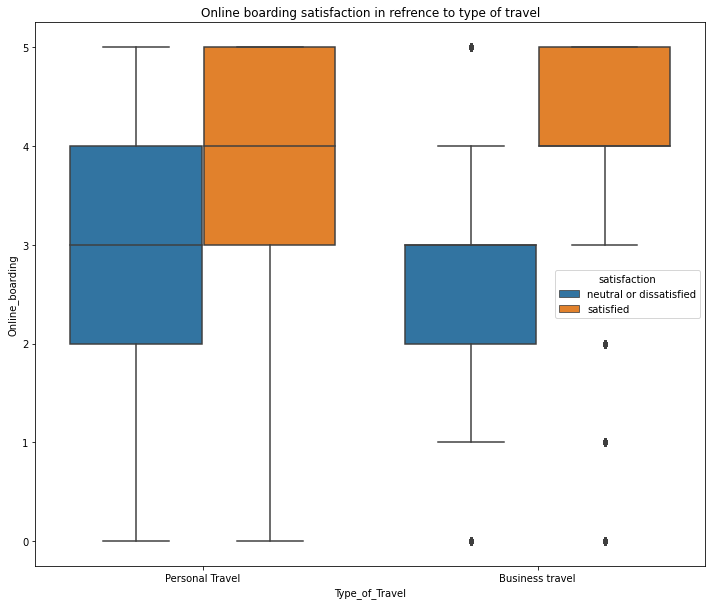

In [31]:
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='Type_of_Travel',y='Online_boarding',hue='satisfaction', data=df)
plt.title("Online boarding satisfaction in refrence to type of travel")

Consumers of business travel are more satisfied from online boarding as their mean lies between 4 and 5.

Text(0.5, 1.0, 'Online boarding satisfaction in refrence to type of travel')

<Figure size 432x288 with 0 Axes>

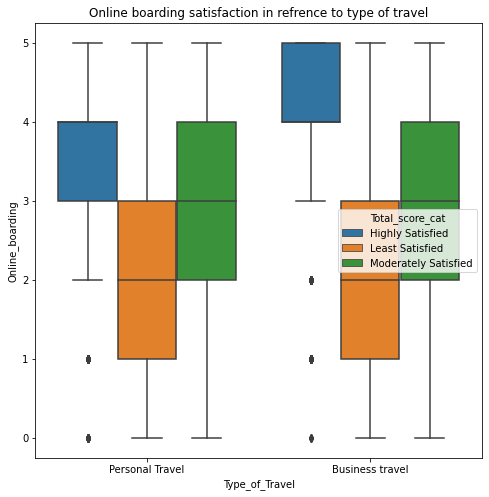

In [32]:
plt.figure()
plt.figure(figsize=(8,8))
sns.boxplot(x='Type_of_Travel',y='Online_boarding',hue='Total_score_cat', data=df)
plt.title("Online boarding satisfaction in refrence to type of travel")

Text(0.5, 1.0, 'Customer Type in Refrence with Age')

<Figure size 432x288 with 0 Axes>

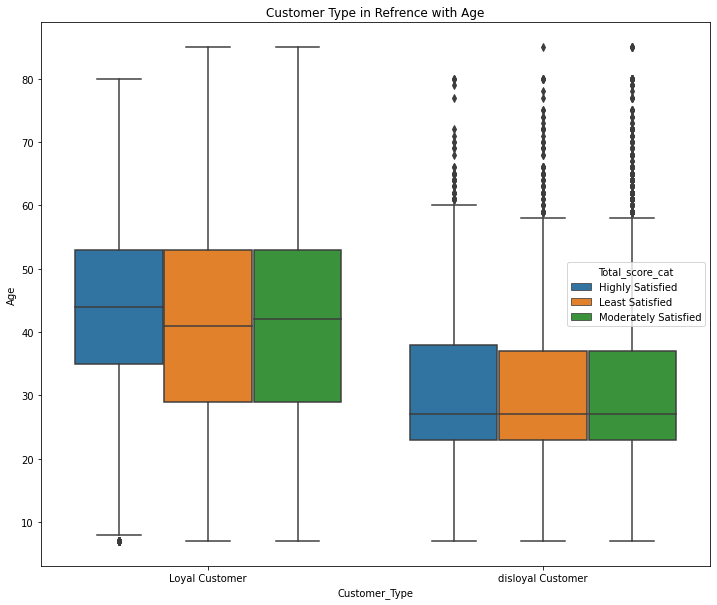

In [33]:
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='Customer_Type',y='Age',hue='Total_score_cat', data=df)
plt.title("Customer Type in Refrence with Age")

disloyal customers have the same mean age for all 3 categories wheras people above 40 are loyal customers.

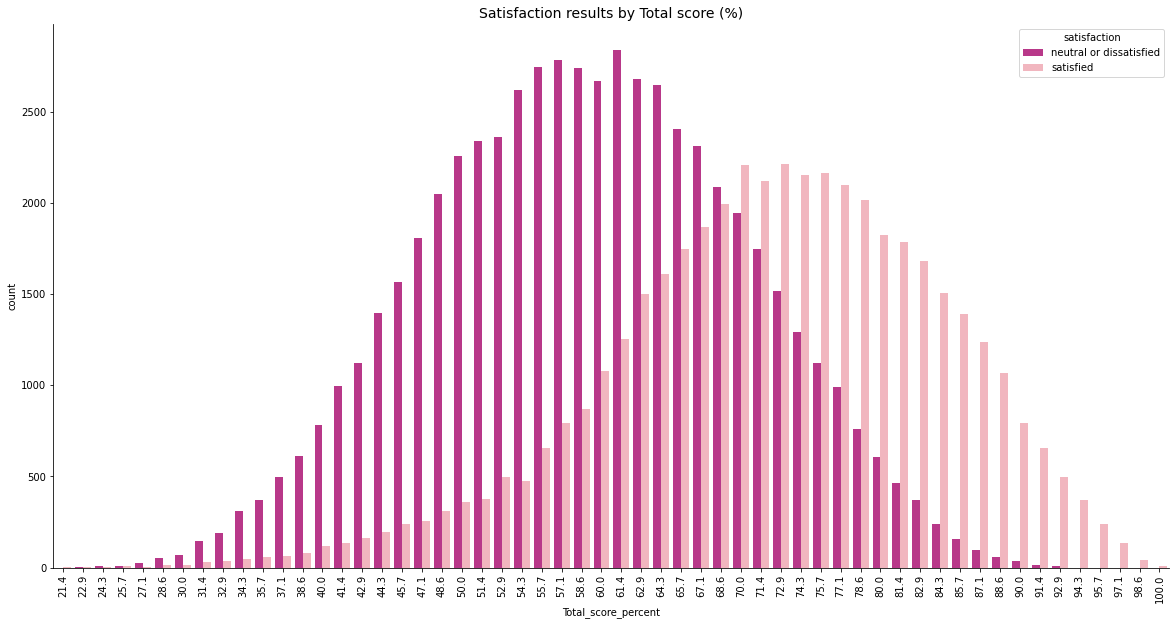

In [34]:
# creating graph for total scores
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = df, hue ="satisfaction",palette ="RdPu_r" )

plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

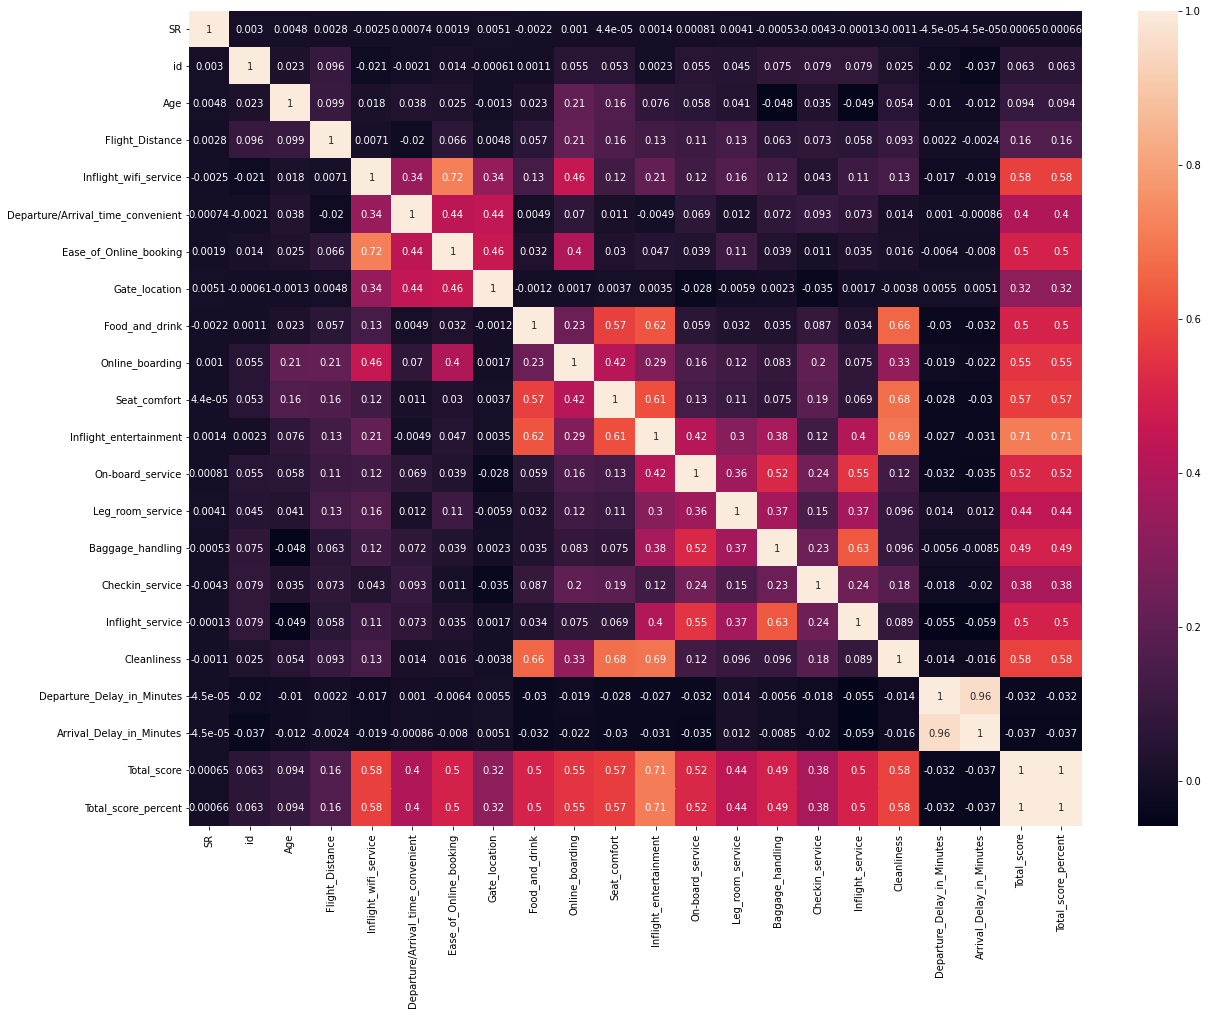

In [35]:
# corelation heat map
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df.corr(), annot = True)

In [36]:
# dropping unwanted columns
df.drop(columns=['Inflight_wifi_service','Departure/Arrival_time_convenient', 
                   'Ease_of_Online_booking','Gate_location', 'Food_and_drink', 
                    'Online_boarding', 'Seat_comfort','Inflight_entertainment', 'On-board_service', 'Leg_room_service',
                    'Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness','Total_score_cat','SR','id'], inplace=True)

In [37]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Total_score,Total_score_percent
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25,18.0,neutral or dissatisfied,54,77.1
1,Male,disloyal Customer,25,Business travel,Business,235,1,6.0,neutral or dissatisfied,32,45.7
2,Female,Loyal Customer,26,Business travel,Business,1142,0,0.0,satisfied,52,74.3
3,Female,Loyal Customer,25,Business travel,Business,562,11,9.0,neutral or dissatisfied,42,60.0
4,Male,Loyal Customer,61,Business travel,Business,214,0,0.0,satisfied,49,70.0


## Label Encoding

In [38]:
# defining categorical variables
cat_new = [col for col in df.columns if df[col].dtypes=='O']
cat_new

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']

In [47]:
# defining numerical variables
num_new = [col for col in df.columns if df[col].dtypes!='O']
num_new

['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction',
 'Total_score',
 'Total_score_percent']

In [39]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

MAX_Gender_VOC = len(le.classes_)
MAX_Gender_VOC

2

In [40]:
le2 = LabelEncoder()
df['Customer_Type'] = le2.fit_transform(df['Customer_Type'])

MAX_Customer_Type_VOC = len(le.classes_)
MAX_Customer_Type_VOC

2

In [41]:
le3 = LabelEncoder()
df['Type_of_Travel'] = le3.fit_transform(df['Type_of_Travel'])

MAX_Type_of_Travel_VOC = len(le.classes_)
MAX_Type_of_Travel_VOC

2

In [42]:
le4 = LabelEncoder()
df['Class'] = le4.fit_transform(df['Class'])

MAX_Class_VOC = len(le.classes_)
MAX_Class_VOC

2

In [43]:
le5 = LabelEncoder()
df['satisfaction'] = le5.fit_transform(df['satisfaction'])

MAX_satisfaction_VOC = len(le.classes_)
MAX_satisfaction_VOC

2

##Splitting Data

In [44]:
# splitting into train and test
X_train, X_valid = train_test_split(df,
                                  random_state=123,
                                  train_size=0.99   
                                 )

print(X_train.shape)     
print(X_valid.shape)    

(102864, 11)
(1040, 11)


In [45]:
X_train.drop('satisfaction', axis=1, inplace=True)

In [51]:
def get_keras_data(dataset):
    X = {'Gender': np.array(dataset.Gender),                                               
         'Customer_Type':  dataset.Customer_Type.values,                                          
         'Type_of_Travel': dataset.Type_of_Travel.values,        
         'Class': dataset.Class.values, 
         'num_vars_in': np.array(dataset[["Age", "Flight_Distance",'Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Total_score','Total_score_percent']])    
    }
    return X

In [52]:
dtrain = get_keras_data(X_train)  

In [56]:
# Input features

Gender =  Input(shape=(1,),                             name="Gender")  
Customer_Type =  Input(shape=(1,),                      name="Customer_Type") 
Type_of_Travel = Input(shape=(1,),                      name="Type_of_Travel") 
Class =  Input(shape=(1,),                              name="Class")
num_vars =  Input(shape=(dtrain["num_vars_in"].shape[1]),  name="num_vars_in")

In [57]:
cat2vec_size = 5    # For categorcal columns 

## Embedding

In [59]:
emb_Gender =  Embedding(MAX_Gender_VOC,     cat2vec_size  )(Gender)
emb_Customer_Type =  Embedding(MAX_Customer_Type_VOC,  cat2vec_size  )(Customer_Type)
emb_Type_of_Travel = Embedding(MAX_Type_of_Travel_VOC, cat2vec_size )(Type_of_Travel)
emb_Class = Embedding(MAX_Class_VOC, cat2vec_size )(Class)

## Concatenation

In [61]:
# Concatenate all layer-branches:

main_l = concatenate(
                        [
                          Flatten() (emb_Gender),
                          Flatten() (emb_Customer_Type),
                          Flatten() (emb_Type_of_Travel),
                          Flatten() (emb_Class),
                           num_vars         
                        ]
                      )

## Classification 

In [66]:
# Add classification layer
main_l = Dense(128,activation='relu') (main_l)
main_l = Dense(64,activation='tanh') (main_l)

In [67]:
# Output neuron
output = Dense(2, activation="sigmoid") (main_l)

## Model

In [69]:
# Formulating Model
model = Model(
              inputs= [                     
                        Gender,
                        Customer_Type,
                        Type_of_Travel,
                        Class,
                        num_vars
                       ],
              outputs= output
              )

In [70]:
# Compiling Model
model.compile(loss="mse",
              optimizer="adam",
              metrics=["mae"]   
              )

In [71]:
# Model Summary  
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Gender (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 Customer_Type (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Type_of_Travel (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Class (InputLayer)             [(None, 1)]          0           []                               
                                                                                            

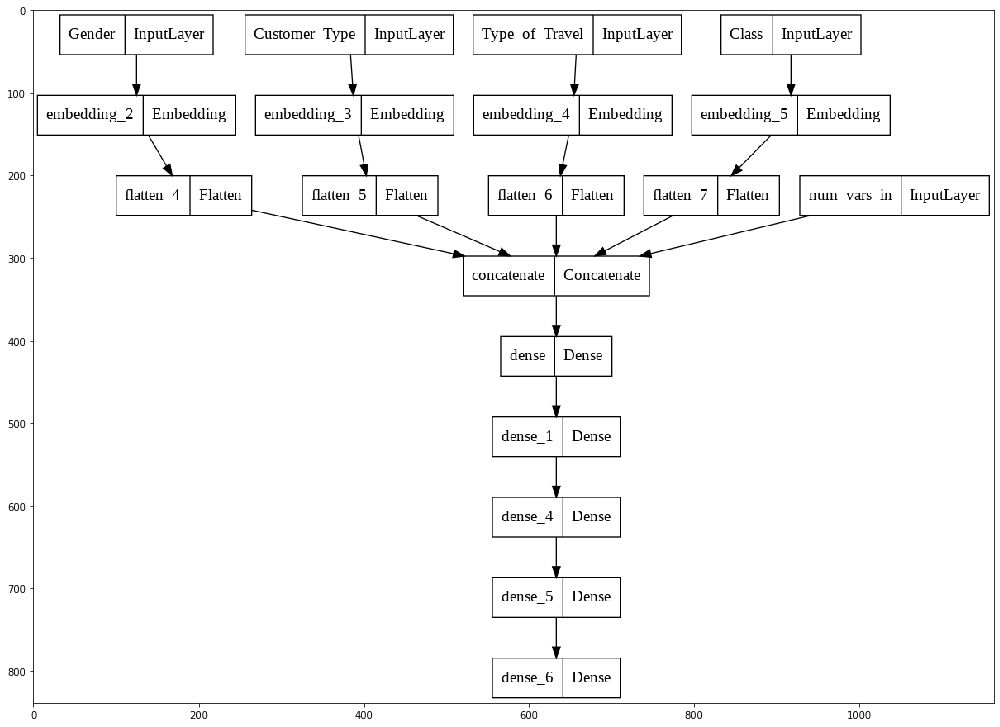

In [72]:
# Plotting the model architecture

plt.figure(figsize = (14,14));
plot_model(model, to_file = "model.png");
io.imshow("model.png");

In [73]:
BATCH_SIZE = 20000
epochs = 5

In [75]:
target_scaler = MinMaxScaler(feature_range=(-1, 1))

In [82]:
# Model Fitting

start = time.time()
history= model.fit(dtrain,
                   X_valid,
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   validation_split = 0.2
                   verbose=1
                  )

end = time.time()
print((end-start)/60) 

SyntaxError: ignored